# Read Data

In [1]:
%reload_ext autoreload
%autoreload 2

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Merged dataset
# Info: Actual Sale Prices (Home Value), Monthly Rental Costs (ObservedRent), Unmployment Rates (Unemployment Rate), Average Gross Income (agi)
# Mortgage Interest Rates (FRM), Crimes (arson; violent crime; property crime)
df = pd.read_csv("../data/merged_data.csv")
df.shape
df.head()

(200590, 19)

,RegionID,RegionName,RegionType,StateName,City_x,Metro,CountyName,Date,HomeValue,ObservedRent,Year,agi_by_zipcode,Arson Count,Property Crimes Count,Violent Crimes Count,30 yr FRM,15 yr FRM,Month,Unemployment Rate
0,95992,90011,zip,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2014-01-31,217288.340727,NaN,2014,148139.166667,1968.0,217493.0,42725.0,4.32,3.4,1,8.9
1,96193,90650,zip,CA,Norwalk,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2014-01-31,320971.644971,NaN,2014,315663.833333,1968.0,217493.0,42725.0,4.32,3.4,1,8.9
2,96361,91331,zip,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2014-01-31,279708.428144,NaN,2014,230927.500000,1968.0,217493.0,42725.0,4.32,3.4,1,8.9
3,96025,90044,zip,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2014-01-31,234390.976285,NaN,2014,159189.166667,1968.0,217493.0,42725.0,4.32,3.4,1,8.9
4,96817,92336,zip,CA,Fontana,"Riverside-San Bernardino-Ontario, CA",San Bernardino County,2014-01-31,322878.970470,NaN,2014,351939.500000,433.0,54778.0,8281.0,4.32,3.4,1,9.0


In [4]:
df.groupby('RegionName').size().head()
df.groupby('RegionID').size().head()

RegionName
90001    130
90002    130
90003    130
90004    130
90005    130
dtype: int64

RegionID
95982    130
95983    130
95984    130
95985    130
95986    130
dtype: int64

In [5]:
# 2020 Census Data
CensusData = pd.read_csv("../data/census_data.csv")
CensusData.head()

# Treat 2020 as an average estimate of the population
df = pd.merge(df, CensusData, left_on='RegionName', right_on = "ZIP", how='left').drop(columns=['ZIP'])
df.shape
df.head()

,ZIP,Total Population,Land Area in Square Miles,Population Per Square Mile (Land Area)
0,90001,55859,3.280100,17029.66501
1,90002,53150,2.992546,17760.79685
2,90003,72764,3.625301,20071.15903
3,90004,58585,3.050773,19203.32847
4,90005,37987,1.179832,32196.94339


(200590, 22)

,RegionID,RegionName,RegionType,StateName,City_x,Metro,CountyName,Date,HomeValue,ObservedRent,...,Arson Count,Property Crimes Count,Violent Crimes Count,30 yr FRM,15 yr FRM,Month,Unemployment Rate,Total Population,Land Area in Square Miles,Population Per Square Mile (Land Area)
0,95992,90011,zip,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2014-01-31,217288.340727,NaN,...,1968.0,217493.0,42725.0,4.32,3.4,1,8.9,102308.0,4.288978,23853.700320
1,96193,90650,zip,CA,Norwalk,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2014-01-31,320971.644971,NaN,...,1968.0,217493.0,42725.0,4.32,3.4,1,8.9,102891.0,9.902496,10390.410580
2,96361,91331,zip,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2014-01-31,279708.428144,NaN,...,1968.0,217493.0,42725.0,4.32,3.4,1,8.9,100720.0,9.344649,10778.361310
3,96025,90044,zip,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2014-01-31,234390.976285,NaN,...,1968.0,217493.0,42725.0,4.32,3.4,1,8.9,94354.0,5.102164,18492.938250
4,96817,92336,zip,CA,Fontana,"Riverside-San Bernardino-Ontario, CA",San Bernardino County,2014-01-31,322878.970470,NaN,...,433.0,54778.0,8281.0,4.32,3.4,1,9.0,100594.0,19.884882,5058.818126


In [6]:
# Accessibility of healthcare facilities.
# Static
healthCare = pd.read_csv("../data/healthcare_data.csv")
healthCare.shape
healthCare.head()

healthCare['HealthCareFacilityAmmount'] = healthCare.groupby('ZIP')['ZIP'].transform('count')
zip_facility_count = healthCare[['ZIP', 'HealthCareFacilityAmmount']].drop_duplicates().reset_index(drop=True)
df = pd.merge(df, zip_facility_count, left_on='RegionName', right_on = "ZIP", how='left').drop(columns=['ZIP'])
df['HealthCareFacilityAmmount'] = df['HealthCareFacilityAmmount'].fillna(0).astype(int)
df.shape
df.head()

(14449, 4)

,_id,FACNAME,CITY,ZIP
0,1,VINEYARD POST ACUTE,PETALUMA,94954
1,2,CREEKSIDE REHABILITATION & BEHAVIORAL HEALTH,SANTA ROSA,95404
2,3,CRESCENT CITY SKILLED NURSING,CRESCENT CITY,95531
3,4,RIDGEWAY POST ACUTE,PETALUMA,94952
4,5,"GRANADA REHAB & WELLNESS CENTER, LP",EUREKA,95503


(200590, 23)

,RegionID,RegionName,RegionType,StateName,City_x,Metro,CountyName,Date,HomeValue,ObservedRent,...,Property Crimes Count,Violent Crimes Count,30 yr FRM,15 yr FRM,Month,Unemployment Rate,Total Population,Land Area in Square Miles,Population Per Square Mile (Land Area),HealthCareFacilityAmmount
0,95992,90011,zip,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2014-01-31,217288.340727,NaN,...,217493.0,42725.0,4.32,3.4,1,8.9,102308.0,4.288978,23853.700320,20
1,96193,90650,zip,CA,Norwalk,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2014-01-31,320971.644971,NaN,...,217493.0,42725.0,4.32,3.4,1,8.9,102891.0,9.902496,10390.410580,26
2,96361,91331,zip,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2014-01-31,279708.428144,NaN,...,217493.0,42725.0,4.32,3.4,1,8.9,100720.0,9.344649,10778.361310,33
3,96025,90044,zip,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2014-01-31,234390.976285,NaN,...,217493.0,42725.0,4.32,3.4,1,8.9,94354.0,5.102164,18492.938250,13
4,96817,92336,zip,CA,Fontana,"Riverside-San Bernardino-Ontario, CA",San Bernardino County,2014-01-31,322878.970470,NaN,...,54778.0,8281.0,4.32,3.4,1,9.0,100594.0,19.884882,5058.818126,7


# Analytics Model
- Date Conversion
- Split the data into training set and testing set

In [7]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200590 entries, 0 to 200589
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   RegionID                                200590 non-null  int64         
 1   RegionName                              200590 non-null  int64         
 2   RegionType                              200590 non-null  object        
 3   StateName                               200590 non-null  object        
 4   City_x                                  196300 non-null  object        
 5   Metro                                   187200 non-null  object        
 6   CountyName                              200590 non-null  object        
 7   Date                                    200590 non-null  datetime64[ns]
 8   HomeValue                               196355 non-null  float64       
 9   ObservedRent                         

/var/folders/dg/3t3jfbts18xb271lqyw2hxpc0000gn/T/ipykernel_32730/2693036174.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)


In [ ]:
# unset plt style
plt.style.use('default')

def plot_entire_series_with_dual_axis(x, y1, y2, ylabel1='HomeValue', ylabel2='ObservedRent'):
    fig, ax1 = plt.subplots(figsize=(16, 4),dpi=300)

    # Plot HomeValue on the left y-axis
    ax1.plot(x, y1, color='black', linewidth=2, label='HomeValue')
    ax1.set_xlabel('Date', fontsize=16)
    ax1.set_ylabel(ylabel1, fontsize=16, color='black')
    ax1.tick_params(axis='y', labelcolor='black')

    # Create a twin y-axis
    ax2 = ax1.twinx()
    ax2.plot(x, y2, color='blue', linewidth=2, label='ObservedRent')
    ax2.set_ylabel(ylabel2, fontsize=16, color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')

    # Add legends for both lines
    ax1.legend(loc='upper left', fontsize=12)
    ax2.legend(loc='lower right', fontsize=12)

    plt.title('HomeValue and ObservedRent over Time (ZIP: 94565)', fontsize=18)
    plt.savefig('../figures/HomeValue_and_ObservedRent_over_Time.png')
    
    plt.show()

    return None

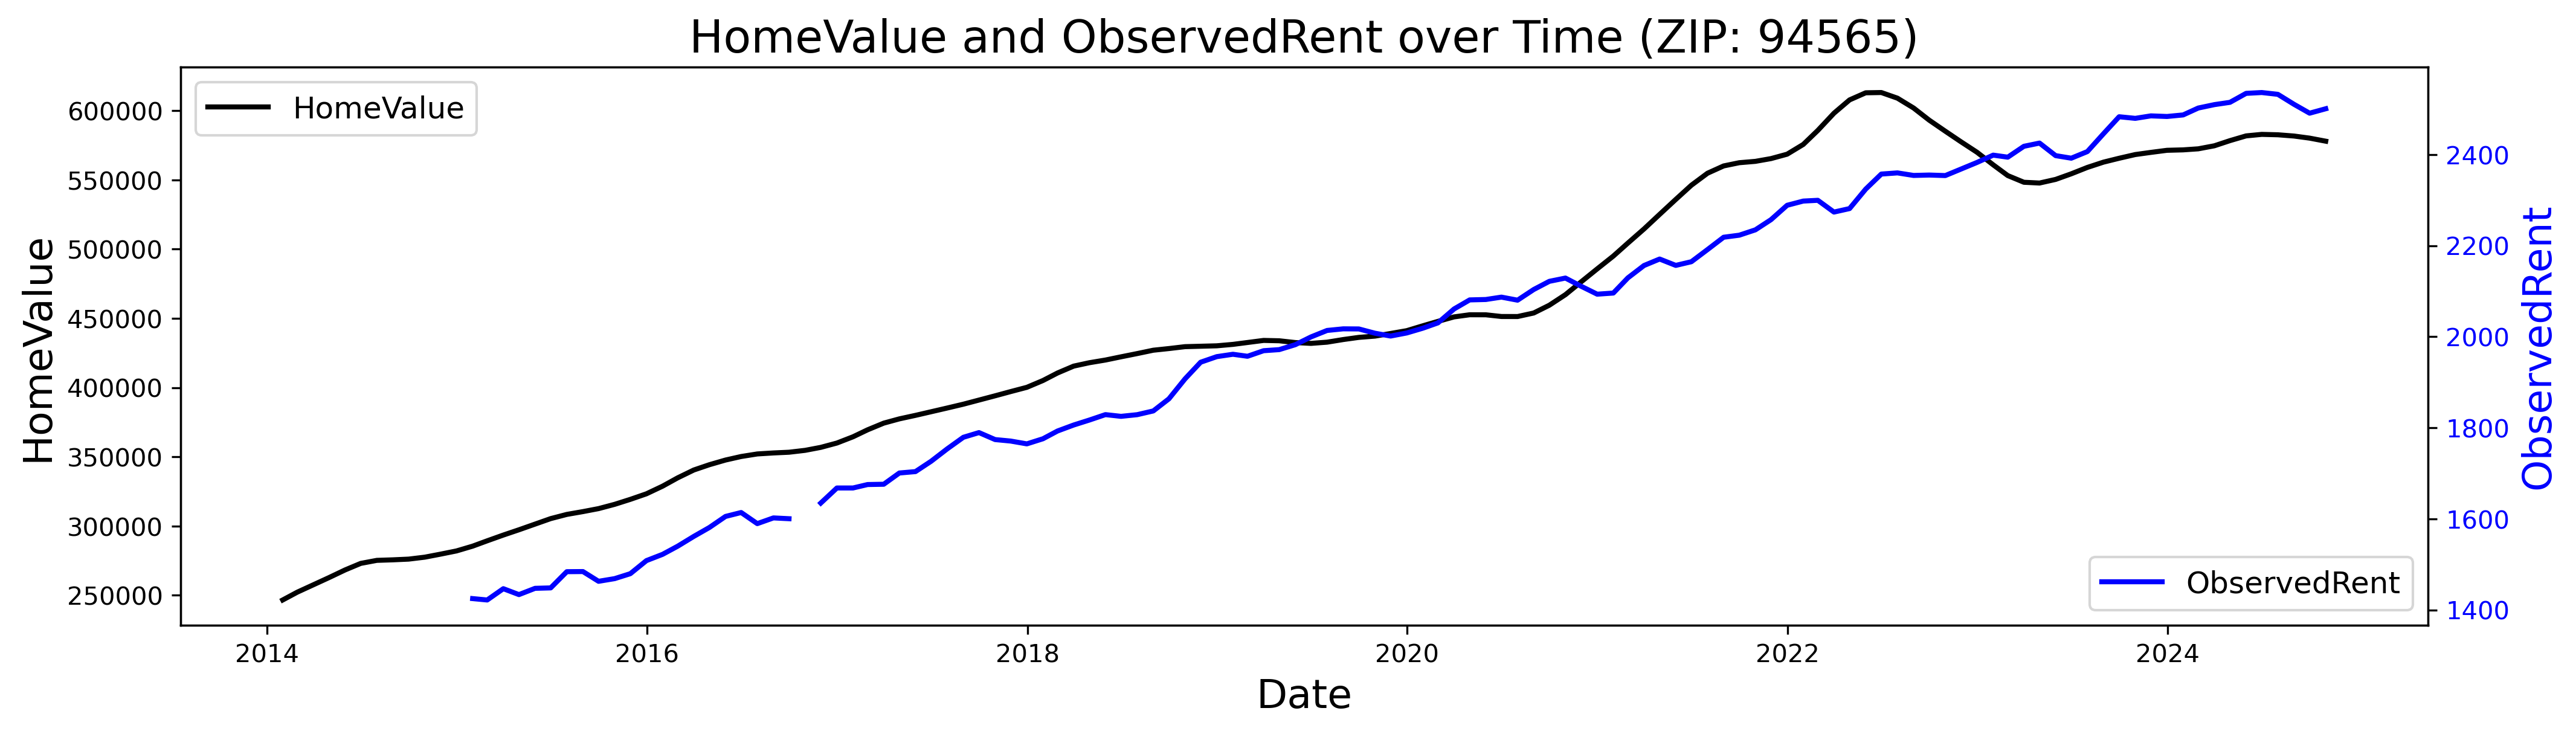

In [38]:
example_region = df[df['RegionName'] == 94565]
x = example_region['Date'].to_numpy()
y1 = example_region['HomeValue'].to_numpy()
y2 = example_region['ObservedRent'].to_numpy()

plot_entire_series_with_dual_axis(x, y1, y2)

In [10]:
np.count_nonzero(np.isnan(y2))

13

<Figure size 3000x1800 with 0 Axes>

<Axes: xlabel='HomeValue', ylabel='ObservedRent'>

Text(0.5, 1.0, 'HomeValue vs. ObservedRent')

Text(0.5, 0, 'HomeValue')

Text(0, 0.5, 'ObservedRent')

Text(0.05, 0.85, 'Pearson Correlation: 0.77')

<Axes: title={'center': 'HomeValue vs. ObservedRent'}, xlabel='HomeValue', ylabel='ObservedRent'>

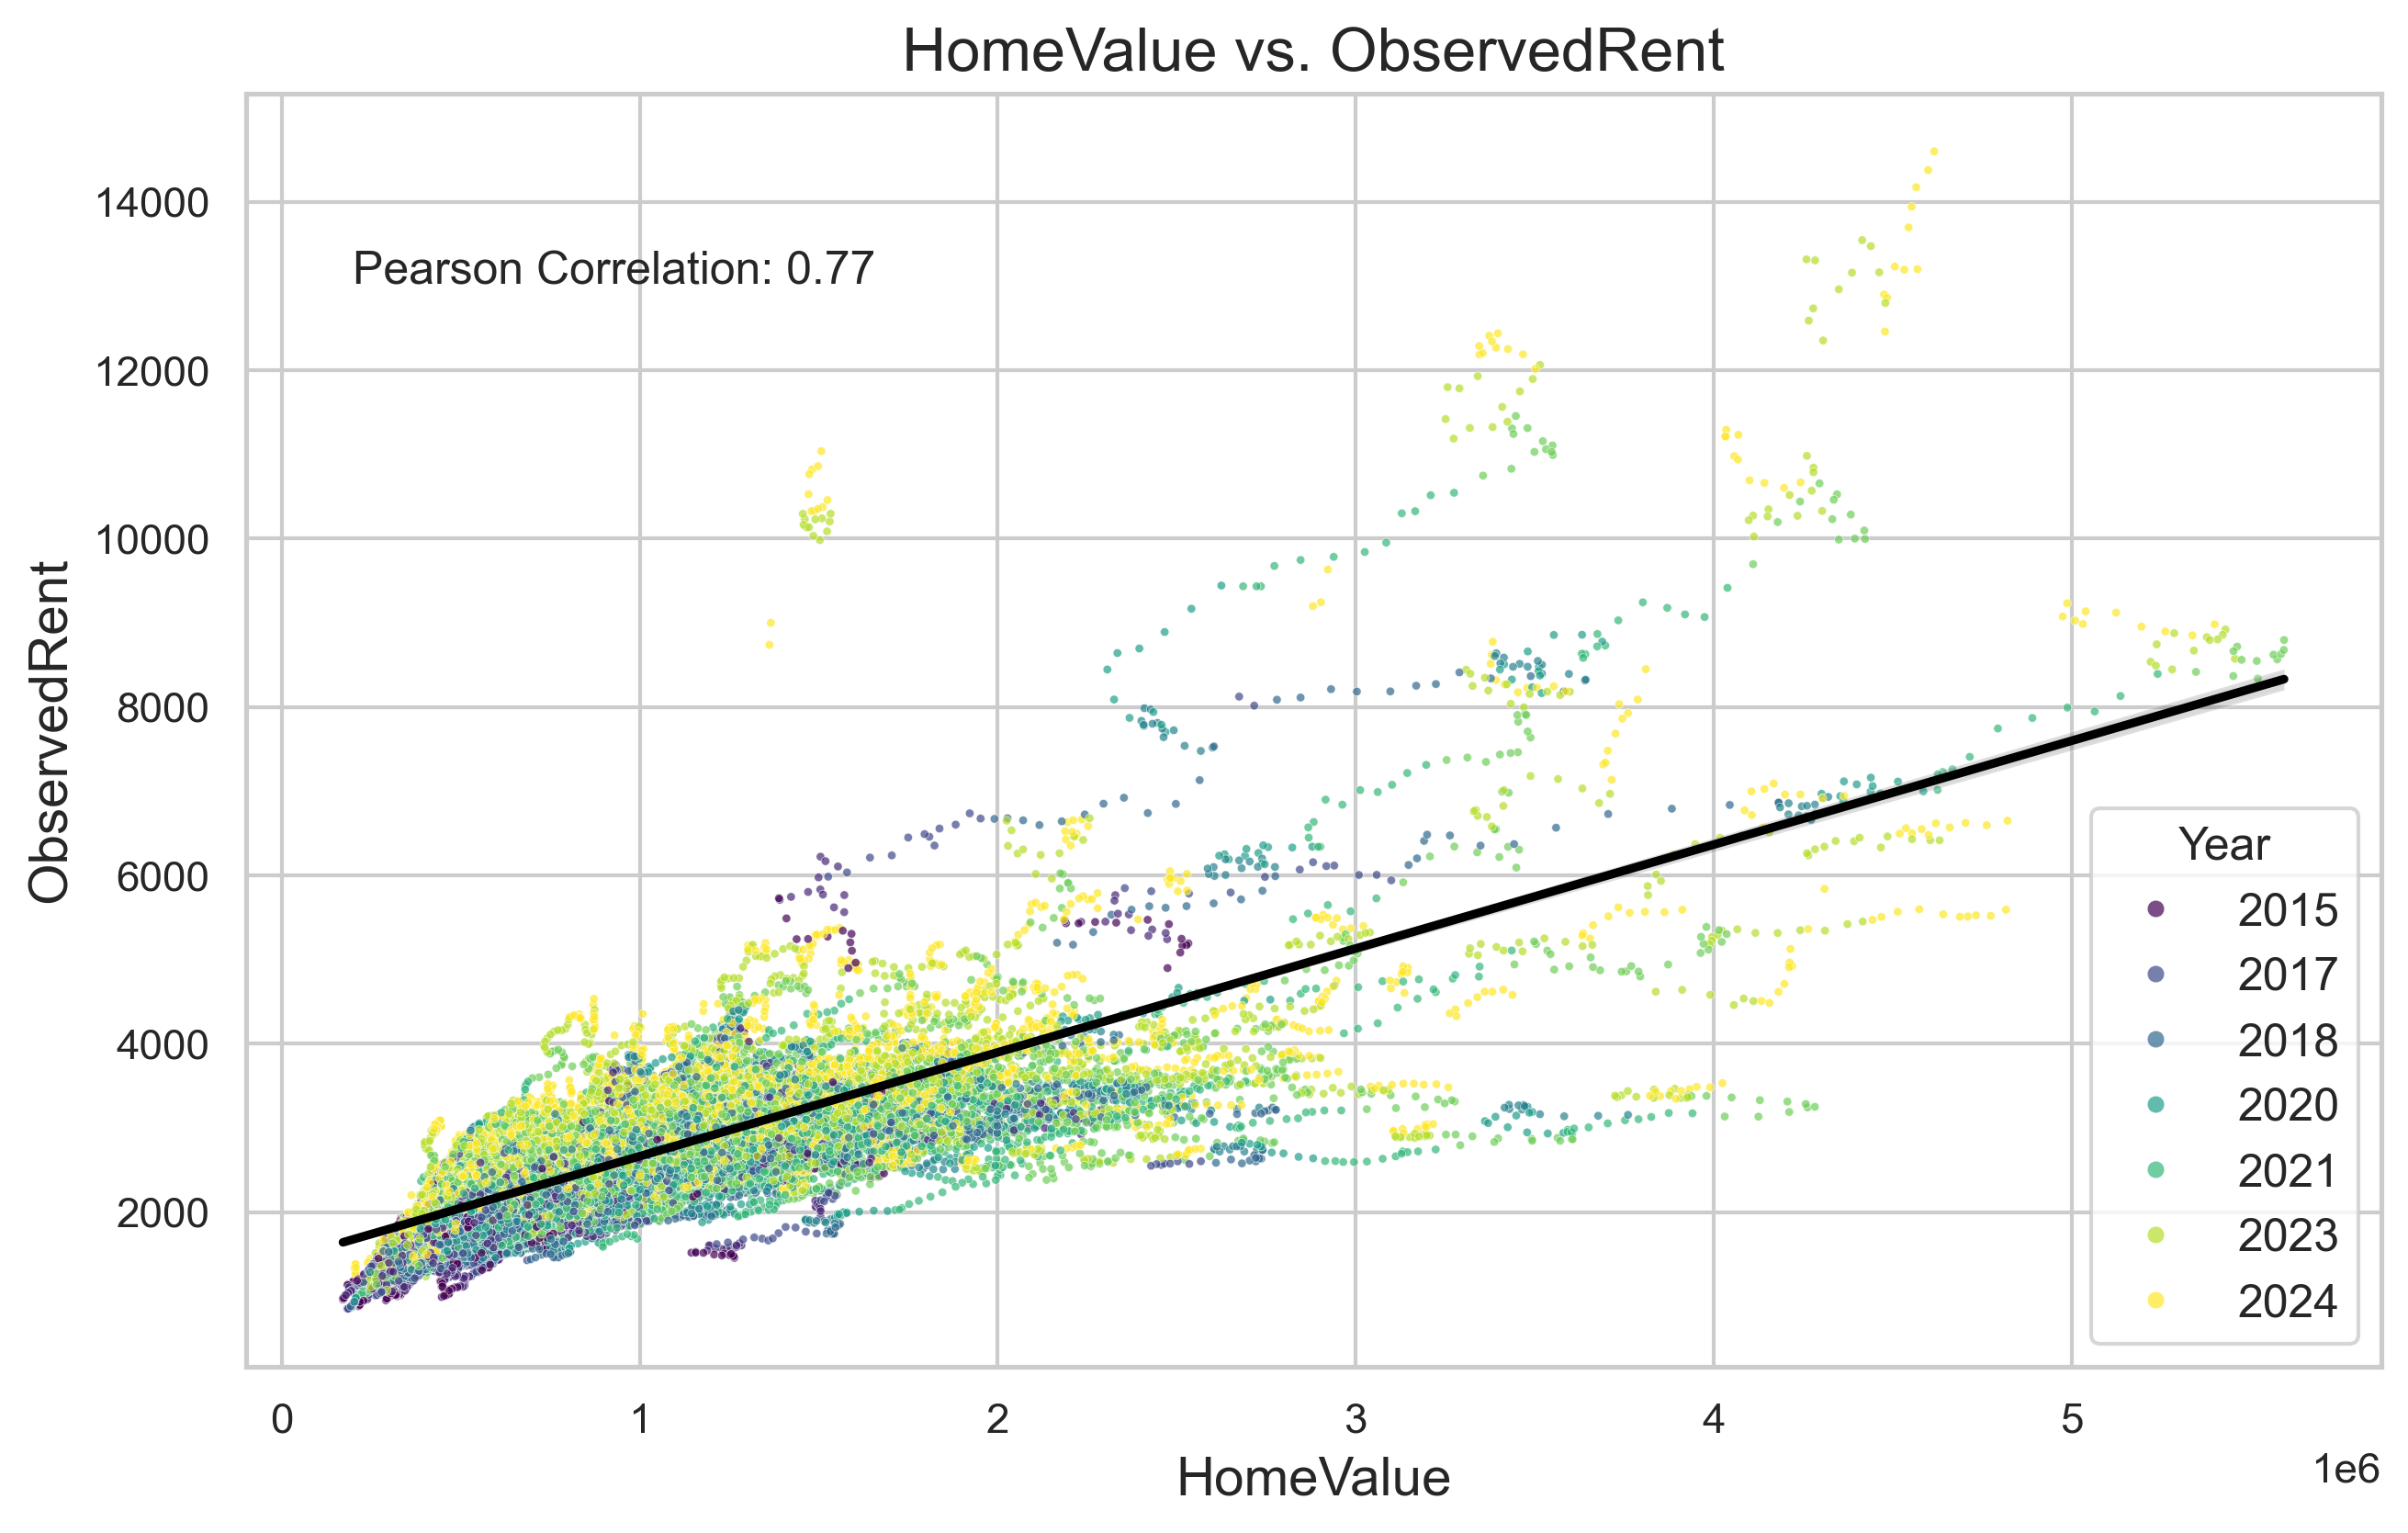

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
# Set transparency of the grid
sns.set_style("whitegrid", {"axes.grid": True})
sns.set_context("notebook")

InteractiveShell.ast_node_interactivity = "last"

# valid_values = example_region[example_region['HomeValue'].notnull() & example_region['ObservedRent'].notnull()]
all_values = []

# scatter plot of HomeValue and ObservedRent, annotate with pearson correlation, color by year
plt.figure(figsize=(10, 6), dpi=300)
# for zip in tqdm(df['RegionName'].unique()):
#     example_region = df[df['RegionName'] == zip]
#     valid_values = example_region[example_region['HomeValue'].notnull() & example_region['ObservedRent'].notnull()]
#     all_values.append(valid_values)
#     sns.scatterplot(x='HomeValue', y='ObservedRent', data=valid_values, hue='Year', palette='viridis', alpha=0.7);

valid_values = df[df['HomeValue'].notnull() & df['ObservedRent'].notnull()]
# shuffle the data
valid_values = valid_values.sample(frac=1, random_state=42)
sns.scatterplot(x='HomeValue', y='ObservedRent', data=valid_values, hue='Year', palette='viridis', alpha=0.7, s=5)

# Set the size of the legend example icons
plt.legend(title='Year', fontsize=12, title_fontsize=12, markerscale=2, loc='lower right')

plt.title('HomeValue vs. ObservedRent', fontsize=16)
plt.xlabel('HomeValue', fontsize=14)
plt.ylabel('ObservedRent', fontsize=14)

# add pearson correlation
correlation = valid_values.loc[:, ['HomeValue', 'ObservedRent']].corr().iloc[0, 1]
plt.text(0.05, 0.85, f'Pearson Correlation: {correlation:.2f}', fontsize=12, transform=plt.gca().transAxes)

# add fit line
sns.regplot(x='HomeValue', y='ObservedRent', data=valid_values, scatter=False, color='black')

plt.savefig('../figures/HomeValue_vs_ObservedRent.png')

plt.show()

InteractiveShell.ast_node_interactivity = "all"

In [12]:
example_region = df[df['RegionName'] == 94530]
example_region

,RegionID,RegionName,RegionType,StateName,City_x,Metro,CountyName,Date,HomeValue,ObservedRent,...,Property Crimes Count,Violent Crimes Count,30 yr FRM,15 yr FRM,Month,Unemployment Rate,Total Population,Land Area in Square Miles,Population Per Square Mile (Land Area),HealthCareFacilityAmmount
687,97738,94530,zip,CA,El Cerrito,"San Francisco-Oakland-Berkeley, CA",Contra Costa County,2014-01-31,NaN,NaN,...,32232.0,3650.0,4.32,3.40,1,7.0,26360.0,4.330332,6087.293573,4
2230,97738,94530,zip,CA,El Cerrito,"San Francisco-Oakland-Berkeley, CA",Contra Costa County,2014-02-28,NaN,NaN,...,32232.0,3650.0,4.37,3.39,2,7.0,26360.0,4.330332,6087.293573,4
3773,97738,94530,zip,CA,El Cerrito,"San Francisco-Oakland-Berkeley, CA",Contra Costa County,2014-03-31,NaN,NaN,...,32232.0,3650.0,4.40,3.42,3,6.9,26360.0,4.330332,6087.293573,4
5316,97738,94530,zip,CA,El Cerrito,"San Francisco-Oakland-Berkeley, CA",Contra Costa County,2014-04-30,NaN,NaN,...,32232.0,3650.0,4.33,3.39,4,6.0,26360.0,4.330332,6087.293573,4
6859,97738,94530,zip,CA,El Cerrito,"San Francisco-Oakland-Berkeley, CA",Contra Costa County,2014-05-31,NaN,NaN,...,32232.0,3650.0,4.12,3.21,5,6.0,26360.0,4.330332,6087.293573,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193562,97738,94530,zip,CA,El Cerrito,"San Francisco-Oakland-Berkeley, CA",Contra Costa County,2024-06-30,1.147626e+06,2570.906917,...,NaN,NaN,6.86,6.16,6,4.7,26360.0,4.330332,6087.293573,4
195105,97738,94530,zip,CA,El Cerrito,"San Francisco-Oakland-Berkeley, CA",Contra Costa County,2024-07-31,1.145933e+06,2577.088231,...,NaN,NaN,6.78,6.07,7,5.2,26360.0,4.330332,6087.293573,4
196648,97738,94530,zip,CA,El Cerrito,"San Francisco-Oakland-Berkeley, CA",Contra Costa County,2024-08-31,1.141185e+06,2565.269446,...,NaN,NaN,6.35,5.51,8,5.3,26360.0,4.330332,6087.293573,4
198191,97738,94530,zip,CA,El Cerrito,"San Francisco-Oakland-Berkeley, CA",Contra Costa County,2024-09-30,1.136204e+06,2587.109658,...,NaN,NaN,6.08,5.16,9,4.8,26360.0,4.330332,6087.293573,4


- Preprocess the data

In [13]:
# see the null values in each column
df.isnull().sum()

RegionID                                       0
RegionName                                     0
RegionType                                     0
StateName                                      0
City_x                                      4290
Metro                                      13390
CountyName                                     0
Date                                           0
HomeValue                                   4235
ObservedRent                              151136
Year                                           0
agi_by_zipcode                             62134
Arson Count                                31630
Property Crimes Count                      31630
Violent Crimes Count                       31630
30 yr FRM                                      0
15 yr FRM                                      0
Month                                          0
Unemployment Rate                              0
Total Population                             260
Land Area in Square 

In [14]:
# drop rows with missing values in HomeValue
df = df.dropna(subset=['HomeValue'])

In [15]:
import warnings
warnings.filterwarnings('ignore')

# For agi, we will use median for the same CountyName
df['agi_by_zipcode'] = df.groupby('CountyName')['agi_by_zipcode'].transform(lambda x: x.fillna(x.median()))

# For Crime, we will use median for the same CountyName and Date
df['Arson Count'] = df.groupby('CountyName')['Arson Count'].transform(lambda x: x.fillna(x.median()))
df['Arson Count'] = df.groupby('Date')['Arson Count'].transform(lambda x: x.fillna(x.median()))
df['Violent Crimes Count'] = df.groupby('CountyName')['Violent Crimes Count'].transform(lambda x: x.fillna(x.median()))
df['Violent Crimes Count'] = df.groupby('Date')['Violent Crimes Count'].transform(lambda x: x.fillna(x.median()))
df['Property Crimes Count'] = df.groupby('CountyName')['Property Crimes Count'].transform(lambda x: x.fillna(x.median()))
df['Property Crimes Count'] = df.groupby('Date')['Property Crimes Count'].transform(lambda x: x.fillna(x.median()))

# For population, drop
df = df.dropna(subset=['Total Population'])

In [16]:
row_80 = df.iloc[int(0.8 * len(df))]
print("80% of the dataset:",row_80['Date'])
df_accessed = df[df['Year']<2023]
df_held_out = df[df['Year']>=2023]
print(df_accessed.shape, df_held_out.shape)

# Features and Target Variable
X = df_accessed[['agi_by_zipcode', 'Arson Count', 'Property Crimes Count', 'Violent Crimes Count',
        '30 yr FRM', '15 yr FRM', 'Unemployment Rate', 'Total Population', 'Land Area in Square Miles',
       'Population Per Square Mile (Land Area)', 'HealthCareFacilityAmmount']]
y = df_accessed['HomeValue']

X_held_out = df_held_out[['agi_by_zipcode', 'Arson Count', 'Property Crimes Count', 'Violent Crimes Count',
                          '30 yr FRM', '15 yr FRM', 'Unemployment Rate', 'Total Population', 
                          'Land Area in Square Miles', 'Population Per Square Mile (Land Area)', 
                        
                          'HealthCareFacilityAmmount']]
y_held_out = df_held_out['HomeValue']

from sklearn.preprocessing import StandardScaler

# Standardize the features and target variable
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Save the scaler for later use
joblib.dump(scaler, '../models/feature_scaler.pkl')

target_scaler = StandardScaler()
y = target_scaler.fit_transform(y.values.reshape(-1, 1))

# Save the target scaler for later use
joblib.dump(target_scaler, '../models/target_scaler.pkl')

X_held_out = scaler.transform(X_held_out)  
y_held_out = target_scaler.transform(y_held_out.values.reshape(-1, 1))  


80% of the dataset: 2022-09-30 00:00:00
(162193, 23) (33902, 23)


['../models/feature_scaler.pkl']

['../models/target_scaler.pkl']

### 1. Linear Regression

In [17]:
df.head()
df.columns

,RegionID,RegionName,RegionType,StateName,City_x,Metro,CountyName,Date,HomeValue,ObservedRent,...,Property Crimes Count,Violent Crimes Count,30 yr FRM,15 yr FRM,Month,Unemployment Rate,Total Population,Land Area in Square Miles,Population Per Square Mile (Land Area),HealthCareFacilityAmmount
0,95992,90011,zip,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2014-01-31,217288.340727,NaN,...,217493.0,42725.0,4.32,3.4,1,8.9,102308.0,4.288978,23853.700320,20
1,96193,90650,zip,CA,Norwalk,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2014-01-31,320971.644971,NaN,...,217493.0,42725.0,4.32,3.4,1,8.9,102891.0,9.902496,10390.410580,26
2,96361,91331,zip,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2014-01-31,279708.428144,NaN,...,217493.0,42725.0,4.32,3.4,1,8.9,100720.0,9.344649,10778.361310,33
3,96025,90044,zip,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2014-01-31,234390.976285,NaN,...,217493.0,42725.0,4.32,3.4,1,8.9,94354.0,5.102164,18492.938250,13
4,96817,92336,zip,CA,Fontana,"Riverside-San Bernardino-Ontario, CA",San Bernardino County,2014-01-31,322878.970470,NaN,...,54778.0,8281.0,4.32,3.4,1,9.0,100594.0,19.884882,5058.818126,7


Index(['RegionID', 'RegionName', 'RegionType', 'StateName', 'City_x', 'Metro',
       'CountyName', 'Date', 'HomeValue', 'ObservedRent', 'Year',
       'agi_by_zipcode', 'Arson Count', 'Property Crimes Count',
       'Violent Crimes Count', '30 yr FRM', '15 yr FRM', 'Month',
       'Unemployment Rate', 'Total Population', 'Land Area in Square Miles',
       'Population Per Square Mile (Land Area)', 'HealthCareFacilityAmmount'],
      dtype='object')

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, '../models/linear_regression_model.pkl')

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

# target_scaler.inverse_transform(y_pred)

LinearRegression()

['../models/linear_regression_model.pkl']

Mean Absolute Error (MAE): 0.41617725108265696
Root Mean Squared Error (RMSE): 0.6863416346200183
R² Score: 0.531709669410483


In [19]:
y_held_out_pred = model.predict(X_held_out)


mae_held_out = mean_absolute_error(y_held_out, y_held_out_pred)
rmse_held_out = np.sqrt(mean_squared_error(y_held_out, y_held_out_pred))
r2_held_out = r2_score(y_held_out, y_held_out_pred)

print(f"Held-Out Mean Absolute Error (MAE): {mae_held_out}")
print(f"Held-Out Root Mean Squared Error (RMSE): {rmse_held_out}")
print(f"Held-Out R² Score: {r2_held_out}")

Held-Out Mean Absolute Error (MAE): 0.6996362022897573
Held-Out Root Mean Squared Error (RMSE): 1.1367525835638708
Held-Out R² Score: 0.18885434122941958


### 2. Ridge Regression

In [20]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

param_grid = {'alpha': [0.1, 1, 10, 100, 1000]}

ridge_cv = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
ridge_cv.fit(X_train, y_train)

best_ridge = ridge_cv.best_estimator_
print(f"Best Ridge alpha: {ridge_cv.best_params_}")

# Save the best Ridge model
joblib.dump(best_ridge, '../models/best_ridge_model.pkl')

y_ridge_pred = best_ridge.predict(X_test)

ridge_mae = mean_absolute_error(y_test, y_ridge_pred)
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_ridge_pred))
ridge_r2 = r2_score(y_test, y_ridge_pred)

print(f"Ridge Mean Absolute Error (MAE): {ridge_mae}")
print(f"Ridge Root Mean Squared Error (RMSE): {ridge_rmse}")
print(f"Ridge R² Score: {ridge_r2}")

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 10, 100, 1000]}, scoring='r2')

Best Ridge alpha: {'alpha': 10}


['../models/best_ridge_model.pkl']

Ridge Mean Absolute Error (MAE): 0.41617440030490377
Ridge Root Mean Squared Error (RMSE): 0.6863426570387465
Ridge R² Score: 0.5317082742185357


### 3. LASSO Regression

In [21]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

lasso_cv = GridSearchCV(lasso, param_grid, cv=5, scoring='r2')
lasso_cv.fit(X_train, y_train)

best_lasso = lasso_cv.best_estimator_
print(f"Best LASSO alpha: {lasso_cv.best_params_}")

# Save the best LASSO model
joblib.dump(best_lasso, '../models/best_lasso_model.pkl')

y_lasso_pred = best_lasso.predict(X_test)

lasso_mae = mean_absolute_error(y_test, y_lasso_pred)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_lasso_pred))
lasso_r2 = r2_score(y_test, y_lasso_pred)

print(f"LASSO Mean Absolute Error (MAE): {lasso_mae}")
print(f"LASSO Root Mean Squared Error (RMSE): {lasso_rmse}")
print(f"LASSO R² Score: {lasso_r2}")

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]}, scoring='r2')

Best LASSO alpha: {'alpha': 0.01}


['../models/best_lasso_model.pkl']

LASSO Mean Absolute Error (MAE): 0.4174729570620726
LASSO Root Mean Squared Error (RMSE): 0.6892395473839048
LASSO R² Score: 0.5277468340026017


### 4. Random Forest

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training set
rf.fit(X_train, y_train.ravel())  # Use .ravel() to flatten the target array if needed

# Save the model
joblib.dump(rf, '../models/rf_model.pkl')

# Predict on the test set
y_rf_pred = rf.predict(X_test)

# Evaluate the model
rf_mae = mean_absolute_error(y_test, y_rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_rf_pred))
rf_r2 = r2_score(y_test, y_rf_pred)

print(f"Random Forest Mean Absolute Error (MAE): {rf_mae}")
print(f"Random Forest Root Mean Squared Error (RMSE): {rf_rmse}")
print(f"Random Forest R² Score: {rf_r2}")

RandomForestRegressor(random_state=42)

['../models/rf_model.pkl']

Random Forest Mean Absolute Error (MAE): 0.028382305733437942
Random Forest Root Mean Squared Error (RMSE): 0.07130076386795704
Random Forest R² Score: 0.9949461439667558


In [23]:
# Predict on held-out data using the trained Random Forest model
y_held_out_pred = rf.predict(X_held_out)

# Evaluate the model on held-out data
rf_held_out_mae = mean_absolute_error(y_held_out, y_held_out_pred)
rf_held_out_rmse = np.sqrt(mean_squared_error(y_held_out, y_held_out_pred))
rf_held_out_r2 = r2_score(y_held_out, y_held_out_pred)

print(f"Random Forest Held-Out Mean Absolute Error (MAE): {rf_held_out_mae}")
print(f"Random Forest Held-Out Root Mean Squared Error (RMSE): {rf_held_out_rmse}")
print(f"Random Forest Held-Out R² Score: {rf_held_out_r2}")

Random Forest Held-Out Mean Absolute Error (MAE): 0.21355770926689258
Random Forest Held-Out Root Mean Squared Error (RMSE): 0.346717917690693
Random Forest Held-Out R² Score: 0.9245395275815773


In [24]:
# Feature importance
importances = rf.feature_importances_
feature_names = ['agi_by_zipcode', 'Arson Count', 'Property Crimes Count', 'Violent Crimes Count',
                 '30 yr FRM', '15 yr FRM', 'Unemployment Rate', 'Total Population', 
                 'Land Area in Square Miles', 'Population Per Square Mile (Land Area)', 
                 'HealthCareFacilityAmmount']

# Display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                                   Feature  Importance
0                           agi_by_zipcode    0.401768
7                         Total Population    0.280834
8                Land Area in Square Miles    0.072938
9   Population Per Square Mile (Land Area)    0.049456
6                        Unemployment Rate    0.042443
2                    Property Crimes Count    0.037167
3                     Violent Crimes Count    0.028492
10               HealthCareFacilityAmmount    0.028162
1                              Arson Count    0.021611
4                                30 yr FRM    0.021078
5                                15 yr FRM    0.016049


### 5. Gradient Boosting

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)

# Train the model on the training set
gbr.fit(X_train, y_train.ravel())  # Use .ravel() to flatten the target array if needed

# Save the model
joblib.dump(gbr, '../models/gbr_model.pkl')

# Predict on the test set
y_gbr_pred = gbr.predict(X_test)

# Evaluate the model
gbr_mae = mean_absolute_error(y_test, y_gbr_pred)
gbr_rmse = np.sqrt(mean_squared_error(y_test, y_gbr_pred))
gbr_r2 = r2_score(y_test, y_gbr_pred)

print(f"Gradient Boosting Mean Absolute Error (MAE): {gbr_mae}")
print(f"Gradient Boosting Root Mean Squared Error (RMSE): {gbr_rmse}")
print(f"Gradient Boosting R² Score: {gbr_r2}")

GradientBoostingRegressor(max_depth=5, n_estimators=200, random_state=42)

['../models/gbr_model.pkl']

Gradient Boosting Mean Absolute Error (MAE): 0.1728305606146215
Gradient Boosting Root Mean Squared Error (RMSE): 0.29198324590194347
Gradient Boosting R² Score: 0.9152479200276619


In [31]:
y_held_out_pred_gbr = gbr.predict(X_held_out)  # Using the trained Gradient Boosting Regressor

# Evaluate on held-out data
gbr_held_out_mae = mean_absolute_error(y_held_out, y_held_out_pred_gbr)
gbr_held_out_rmse = np.sqrt(mean_squared_error(y_held_out, y_held_out_pred_gbr))
gbr_held_out_r2 = r2_score(y_held_out, y_held_out_pred_gbr)

print(f"Gradient Boosting Held-Out Mean Absolute Error (MAE): {gbr_held_out_mae}")
print(f"Gradient Boosting Held-Out Root Mean Squared Error (RMSE): {gbr_held_out_rmse}")
print(f"Gradient Boosting Held-Out R² Score: {gbr_held_out_r2}")

Gradient Boosting Held-Out Mean Absolute Error (MAE): 0.40974820048239763
Gradient Boosting Held-Out Root Mean Squared Error (RMSE): 0.7008967779508604
Gradient Boosting Held-Out R² Score: 0.6916279020806049


In [32]:
# Feature importance
importances = gbr.feature_importances_
feature_names = ['agi_by_zipcode', 'Arson Count', 'Property Crimes Count', 'Violent Crimes Count',
                          '30 yr FRM', '15 yr FRM', 'Unemployment Rate', 'Total Population', 
                          'Land Area in Square Miles', 'Population Per Square Mile (Land Area)', 
                          'HealthCareFacilityAmmount']  # Exclude the target column

# Display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                                   Feature  Importance
0                           agi_by_zipcode    0.423017
7                         Total Population    0.281196
8                Land Area in Square Miles    0.076014
6                        Unemployment Rate    0.055414
9   Population Per Square Mile (Land Area)    0.038554
2                    Property Crimes Count    0.026965
4                                30 yr FRM    0.025232
3                     Violent Crimes Count    0.024351
1                              Arson Count    0.020690
5                                15 yr FRM    0.016381
10               HealthCareFacilityAmmount    0.012188


## Visualize the best model

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# inverse transform the target variable
y_raw_test = target_scaler.inverse_transform(y_test.reshape(-1, 1)).squeeze()
y_raw_rf_pred = target_scaler.inverse_transform(y_rf_pred.reshape(-1, 1)).squeeze()
y_raw_held_out = target_scaler.inverse_transform(y_held_out.reshape(-1, 1)).squeeze()
y_raw_held_out_pred = target_scaler.inverse_transform(y_held_out_pred.reshape(-1, 1)).squeeze()


In [ ]:
import matplotlib.pyplot as plt

# Reset Matplotlib settings to default
plt.rcdefaults()

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

# Define the number of ticks
num_ticks = 6  # Adjust for more or fewer ticks

df_held_out = pd.DataFrame({
    'Actual': y_raw_held_out.flatten(),
    'Predicted': y_raw_held_out_pred,
    'YearMonth': pd.to_datetime(df_held_out['Date']).dt.to_period('M')
})

# Convert YearMonth to numerical format for normalization
df_held_out['YearMonthNumeric'] = df_held_out['YearMonth'].apply(lambda x: x.to_timestamp().timestamp())

# Shuffle the rows to avoid visual bias
df_held_out = df_held_out.sample(frac=1, random_state=42).reset_index(drop=True)


<Figure size 3000x1800 with 0 Axes>

Text(0.05, 0.9, 'Pearson Correlation: 0.96')

Text(0.5, 0, 'Actual HomeValue / Million')

Text(0, 0.5, 'Predicted HomeValue / Million')

Text(0.5, 1.0, 'Actual vs. Predicted HomeValue')

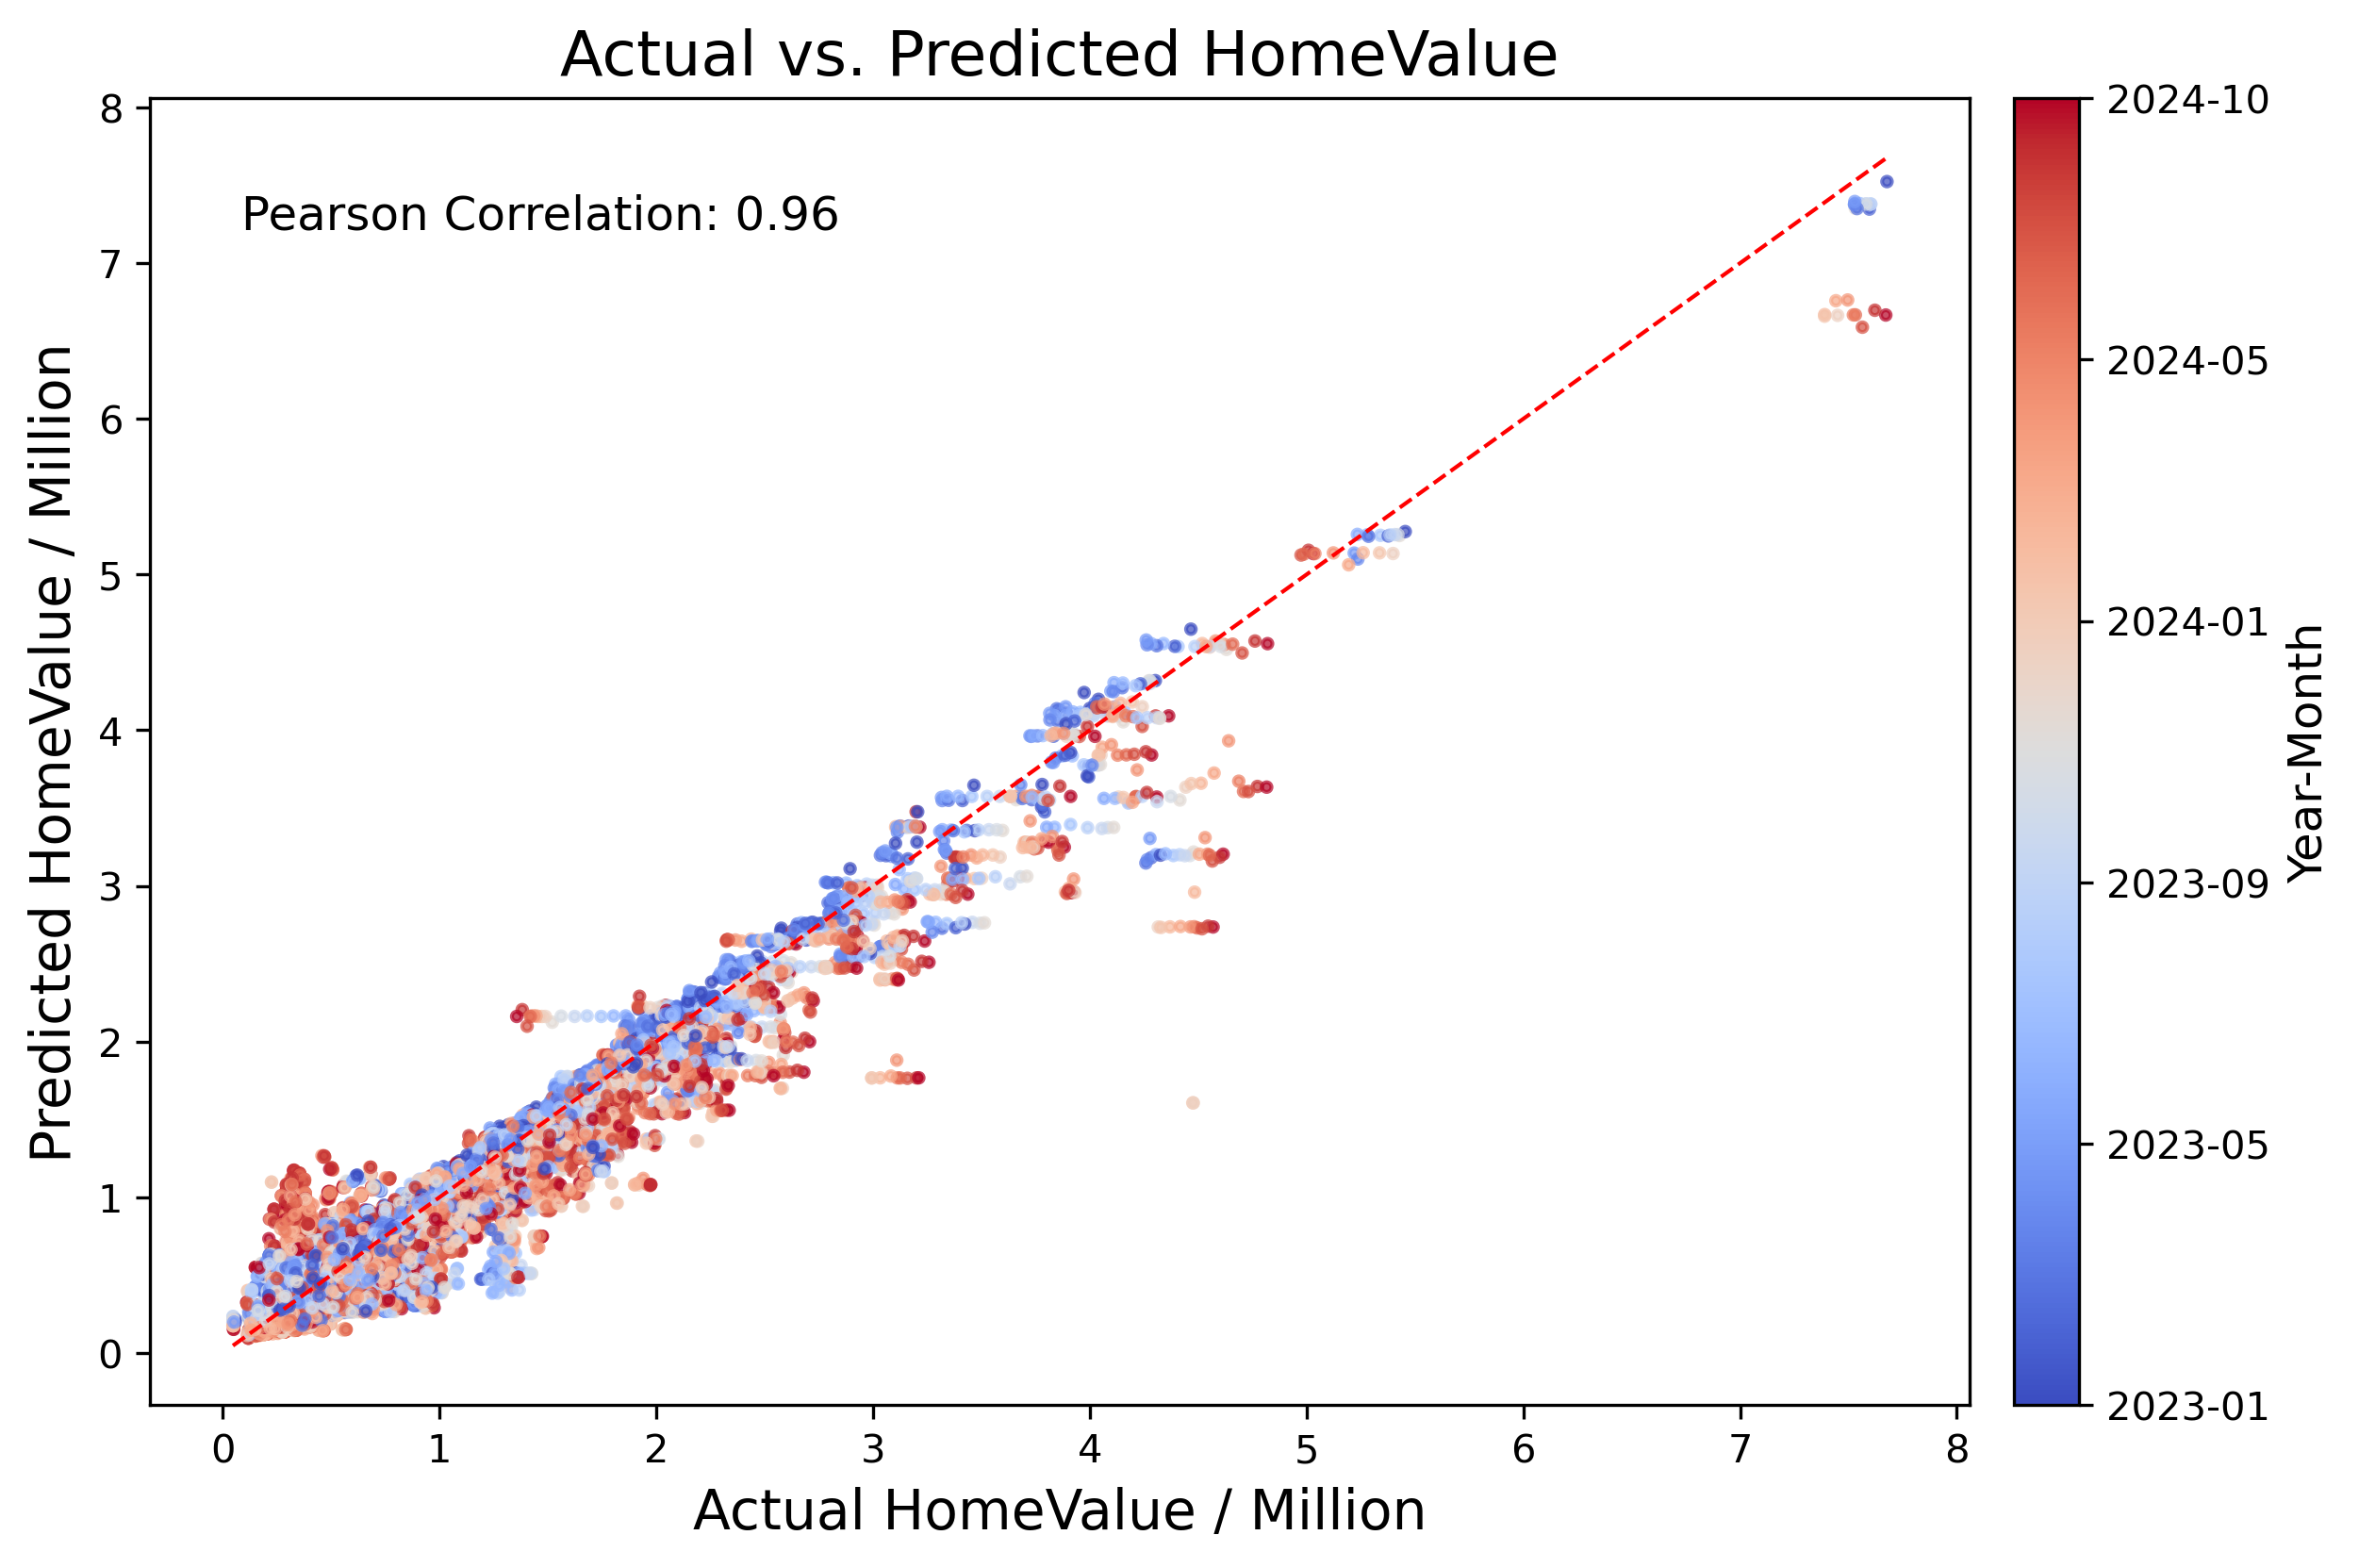

In [36]:

cmap = mpl.cm.coolwarm
norm = mpl.colors.Normalize(vmin=df_held_out['YearMonthNumeric'].min(), vmax=df_held_out['YearMonthNumeric'].max())
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(df_held_out['YearMonthNumeric'])

# Generate evenly spaced tick positions within the YearMonthNumeric range
tick_positions = np.linspace(
    df_held_out['YearMonthNumeric'].min(),
    df_held_out['YearMonthNumeric'].max(),
    num_ticks
)

# Convert the tick positions into readable date labels (YYYY-MM format)
tick_labels = pd.to_datetime(tick_positions, unit='s').strftime('%Y-%m')

# Scatter plot of Actual vs. Predicted (in units of millions)
plt.figure(figsize=(10, 6), dpi=300)
plt.scatter(
    df_held_out['Actual'] / 1e6,  # Convert to millions
    df_held_out['Predicted'] / 1e6,  # Convert to millions
    c=df_held_out['YearMonthNumeric'],
    cmap=cmap,
    alpha=0.7,
    s=6
)

# Add a reference line for perfect prediction
plt.plot(
    [df_held_out['Actual'].min() / 1e6, df_held_out['Actual'].max() / 1e6],
    [df_held_out['Actual'].min() / 1e6, df_held_out['Actual'].max() / 1e6],
    '--r', linewidth=1, label='Perfect Prediction'
)

# Add Pearson Correlation
correlation = df_held_out['Actual'].corr(df_held_out['Predicted'])
plt.text(
    0.05, 0.9,
    f'Pearson Correlation: {correlation:.2f}',
    fontsize=12,
    transform=plt.gca().transAxes
)

# Add custom colorbar
cbar = plt.colorbar(sm, orientation='vertical', pad=0.02, ax=plt.gca())
cbar.set_label('Year-Month', fontsize=12)

# Update the colorbar ticks and labels
cbar.set_ticks(tick_positions)
cbar.set_ticklabels(tick_labels)

# Add labels and title
plt.xlabel('Actual HomeValue / Million', fontsize=14)
plt.ylabel('Predicted HomeValue / Million', fontsize=14)
plt.title('Actual vs. Predicted HomeValue', fontsize=16)

plt.savefig('../figures/Random_Forest_Outcome.png')
plt.show()